# Edges and their frecuencies

### Import the libraries necessaries

In [1]:
import igraph as ig
import pandas as pd
import numpy as np

### Import the data

The data import the different interactions among genes. The data has two columns: one whith 'INTERACTOR_A' and second whith 'INTERACTOR_B', and each row is a pair of genes who interact. So a same gen can appear several times on each column. 

In [28]:
data=pd.read_csv("/home/camilo/Documentos/Andres/Data_inicial.txt", delimiter='\t')

### Data Adjusment 

Here it uses the pandas library to remove the duplicated nodes and just leave one of them.

In [23]:
Edges=data[['INTERACTOR_A','INTERACTOR_B']]
Nodos=data['INTERACTOR_A']
Nodos=Nodos.append(data['INTERACTOR_B'],ignore_index=True)
Nodos=Nodos.drop_duplicates(keep='first')
Nodos=np.array(Nodos)
Edges=np.array(Edges)

The graph is created with igraph library and simplified by removing the multiple and self loop edges and keeping the frecuency attribute of each one

In [33]:
G=ig.Graph()
G.add_vertices(Nodos)
G.add_edges(Edges)
G.es['Frecuency']=G.count_multiple()
G.simplify(combine_edges='first')

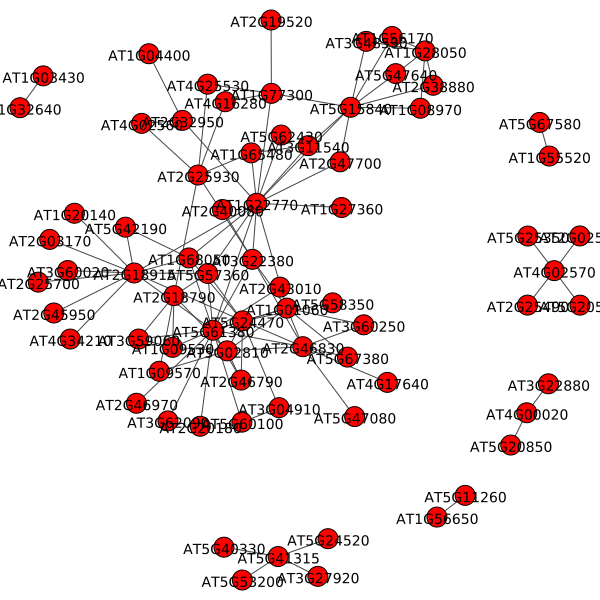

In [32]:
ig.plot(G, vertex_label=Nodos)